In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Uber.csv')
data

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,2015-01-01 01:00:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
6,2015-01-01 01:00:00,NaN,4,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
7,2015-01-01 02:00:00,Bronx,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
9,2015-01-01 02:00:00,EWR,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y


In [17]:
# data info
print("---------------------dataset information : \n",data.info())
print("\n ----------------------first 5 rows : \n",data.head())
print("\n -------------------- datatypes : \n",data.dtypes)
print("\n -----------------missing values : \n",data.isnull().sum())
print("\n---------------------duplicated values : \n",data.duplicated().sum())
print("\n-----------------------unique values : \n",data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
pickup_dt    29101 non-null datetime64[ns]
borough      26058 non-null object
pickups      29101 non-null int64
spd          29101 non-null float64
vsb          29101 non-null float64
temp         29101 non-null float64
dewp         29101 non-null float64
slp          29101 non-null float64
pcp01        29101 non-null float64
pcp06        29101 non-null float64
pcp24        29101 non-null float64
sd           29101 non-null float64
hday         29101 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB
---------------------dataset information : 
 None

 ----------------------first 5 rows : 
             pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  \
0 2015-01-01 01:00:00      Bronx      152  5.0  10.0  30.0   7.0  1023.5   
1 2015-01-01 01:00:00   Brooklyn     1519  5.0  10.0  30.0   7.0  1023.5   
2 2015-01-01 01:00:0

In [16]:
data['pickup_dt']=pd.to_datetime(data.pickup_dt)

In [4]:
print("cities : ",data.borough.unique())

cities :  ['Bronx' 'Brooklyn' 'EWR' 'Manhattan' 'Queens' 'Staten Island' nan]


In [5]:
data.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


Wall time: 0 ns


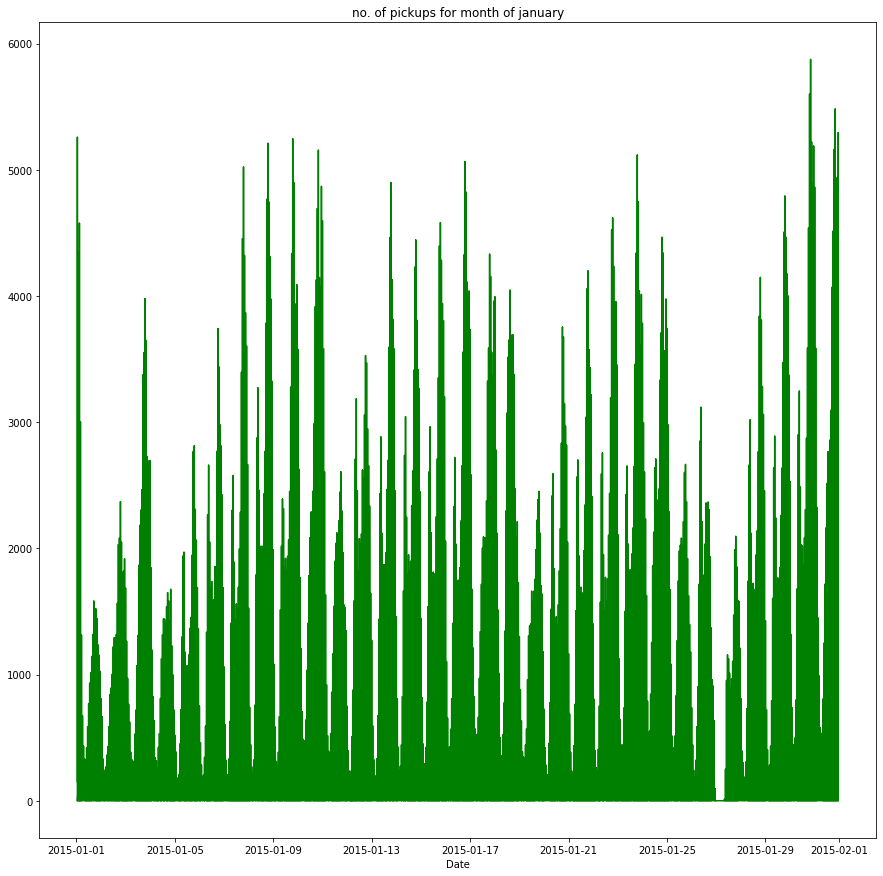

In [30]:
# print((data['pickup_dt'].dt.month))
data_jan=data[data['pickup_dt'].dt.month ==1]
# print(data_jan)
%time
plt.figure(figsize=(15,15))
plt.plot(data_jan['pickup_dt'],data_jan['pickups'],color='green')
plt.xlabel('Date',)
plt.title(label='no. of pickups for month of january')
plt.show()